<a href="https://colab.research.google.com/github/ksdkamesh99/AI-Capstone-Project/blob/master/loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Light Mask Loss

In [1]:
import numpy as np
from PIL import Image
import tensorflow as tf
from urllib import request

In [2]:
from tensorflow.keras.preprocessing.image import load_img
from io import BytesIO


In [3]:
img=load_img("rgb.jpg")

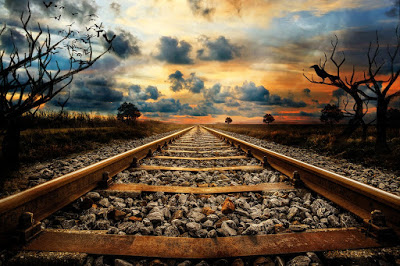

In [4]:
img

In [5]:
def max_rgb_filter(img):
  img=tf.keras.preprocessing.image.img_to_array(img)
  r,g,b=tf.split(img,3,-1)
  max=tf.maximum(tf.maximum(r,g),b)
  b_broadcast = tf.zeros(tf.shape(r), dtype=r.dtype)
  r=tf.where(r<max,b_broadcast,r)
  g=tf.where(g<max,b_broadcast,g)
  b=tf.where(b<max,b_broadcast,b)
  img=tf.concat([r,g,b],axis=-1)
  img_rgb_filter=tf.keras.preprocessing.image.array_to_img(img)
  return img_rgb_filter



In [7]:
img1=max_rgb_filter(img)

In [9]:
img=tf.keras.preprocessing.image.img_to_array(img)
img1=tf.keras.preprocessing.image.img_to_array(img1)


In [11]:
tf.divide(img,img1)

<tf.Tensor: shape=(266, 400, 3), dtype=float32, numpy=
array([[[inf, inf,  1.],
        [inf,  1., inf],
        [inf,  1., inf],
        ...,
        [inf, inf,  1.],
        [inf, inf,  1.],
        [inf, inf,  1.]],

       [[inf, inf,  1.],
        [inf, inf,  1.],
        [inf,  1., inf],
        ...,
        [inf, inf,  1.],
        [inf, inf,  1.],
        [inf, inf,  1.]],

       [[inf, inf,  1.],
        [inf, inf,  1.],
        [inf,  1., inf],
        ...,
        [inf, inf,  1.],
        [inf, inf,  1.],
        [inf, inf,  1.]],

       ...,

       [[ 1., inf, inf],
        [ 1., inf, inf],
        [ 1., nan, nan],
        ...,
        [ 1., inf, inf],
        [ 1., inf, inf],
        [ 1., inf, inf]],

       [[ 1.,  1., inf],
        [ 1., inf, inf],
        [inf, nan,  1.],
        ...,
        [ 1., inf, inf],
        [ 1., inf, inf],
        [ 1., inf, inf]],

       [[ 1.,  1., inf],
        [ 1., inf, inf],
        [inf, nan,  1.],
        ...,
        [ 1., inf, 

# Enhancement Loss 

In [14]:
def enhancement_loss(x,y):
  diff=tf.subtract(x,y)
  norm=tf.norm(diff)
  return norm

In [15]:
enhancement_loss(img,img1)

<tf.Tensor: shape=(), dtype=float32, numpy=44234.71>